# Penetracion de internet


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# ETL

Cargamos los datasets con los que trabajaremos

In [2]:
df = pd.read_csv('../Datasets/Penetracion-hogares.csv')
df2 = pd.read_csv('../Datasets/Penetración-poblacion.csv')
pen_internet = pd.merge(df, df2, on=['Año', 'Trimestre', 'Provincia'])

pen_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
 4   Accesos por cada 100 hab      960 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 37.6+ KB


Cambiaremos el nombre de la columna `Accesos por cada 100 hab` por `Accesos_100_hab` y `Accesos por cada 100 hogares` por `Accesos_100_hogares` para que sea mas legible.

In [3]:
pen_internet.rename(columns={'Accesos por cada 100 hab': 'Accesos_100_hab', 'Accesos por cada 100 hogares': 'Accesos_100_hogares'}, inplace=True)

Comprobamos si contiene datos nulos o duplicados

In [4]:
print("Total de observaciones: ", pen_internet.shape[0])
print("Total de nulos: ", pen_internet.isna().sum().sum())
print("Total de duplicados", pen_internet.duplicated().sum().sum())

pen_internet.describe()

Total de observaciones:  960
Total de nulos:  0
Total de duplicados 0


,Año,Trimestre,Accesos_100_hogares,Accesos_100_hab
count,960.000000,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405,15.394079
std,2.873778,1.118617,23.898192,9.168959
min,2014.000000,1.000000,9.347208,2.684669
25%,2016.000000,1.750000,32.856870,8.764189
50%,2018.500000,2.500000,48.817167,13.417453
75%,2021.000000,3.250000,65.116858,19.657928
max,2023.000000,4.000000,124.061394,52.236739


No se encontran datos nulos ni duplicados. Uso el .describe() para comprobar los datos estadísticos, y no hay ningun problema.

# Outliers

Como ya verificamos que no hay datos invalidos, ahora buscaremos outliers.
En este caso verificaremos los datos de la columna `Accesos_100_hab` y `Accesos_100_hogares` graficando un boxplot de ambas columnas.

<Axes: >

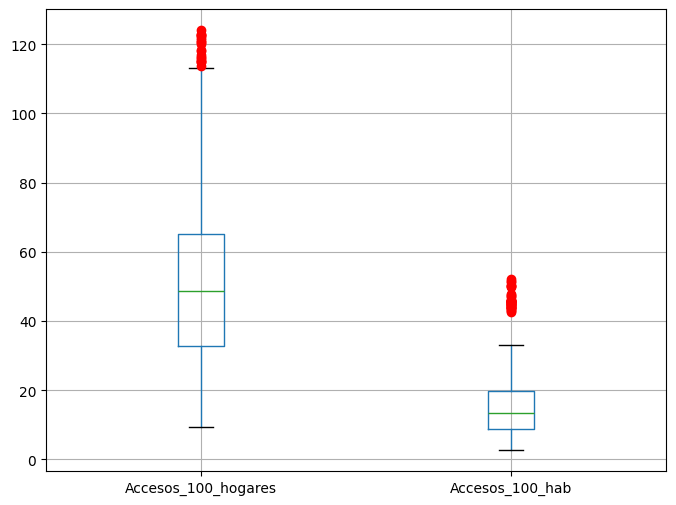

In [5]:
columns = ["Accesos_100_hogares", "Accesos_100_hab"]
pen_internet.boxplot(column=columns, sym='ro', figsize=(8, 6))

Usamos bloxplot para ver los datos de atipicos de manera efectiva permitiendonos la identificación de outliers para garantizar la presicion de los analisis futuros.

En el grafico podemos ver que hay varios datos atipicos y nos encargaremos de ellos. 

- Primero creamos la funcion `find_outliers` para detectar los outliers y los retorne.
- Creamos una iteracion con `for` por ejecutar la funcion con cada columna.
- Por ultimo por ultimo eliminares los outliers del dataframe.

In [6]:
def outliers_iqr(column: pd.Series) -> tuple:
    q1, q3 = column.quantile(0.25), column.quantile(0.75)
    iqr = q3 - q1
    
    top = q3 + 1.5 * iqr
    bot = q3 - 1.5 * iqr
    
    return ((column < bot) | (column > top))

In [7]:
outliers = {}
columnas = ["Accesos_100_hogares", "Accesos_100_hab"]
for columna in columnas:
    outlier = outliers_iqr(column=pen_internet[columna])
    outliers[columna] = outlier
    
print(pen_internet[outliers["Accesos_100_hogares"]]["Provincia"].value_counts())
print()
print(pen_internet[outliers["Accesos_100_hab"]]["Provincia"].value_counts())

Provincia
Capital Federal        20
San Luis               18
Santiago Del Estero     9
La Rioja                7
Name: count, dtype: int64

Provincia
Capital Federal    40
San Luis           15
Name: count, dtype: int64


Podemos ver que hubo un fuerte crecimiento de los accesos por internet de los residentes de la San Luis, y de la Capital Federal. 

# Graficos

Graficamos distintos promedios de los accesos a internet, uno sera por año y el otro por provincia.

Primero visualizamos el crecimiento de los accesos por hogares y por habitantes por año.

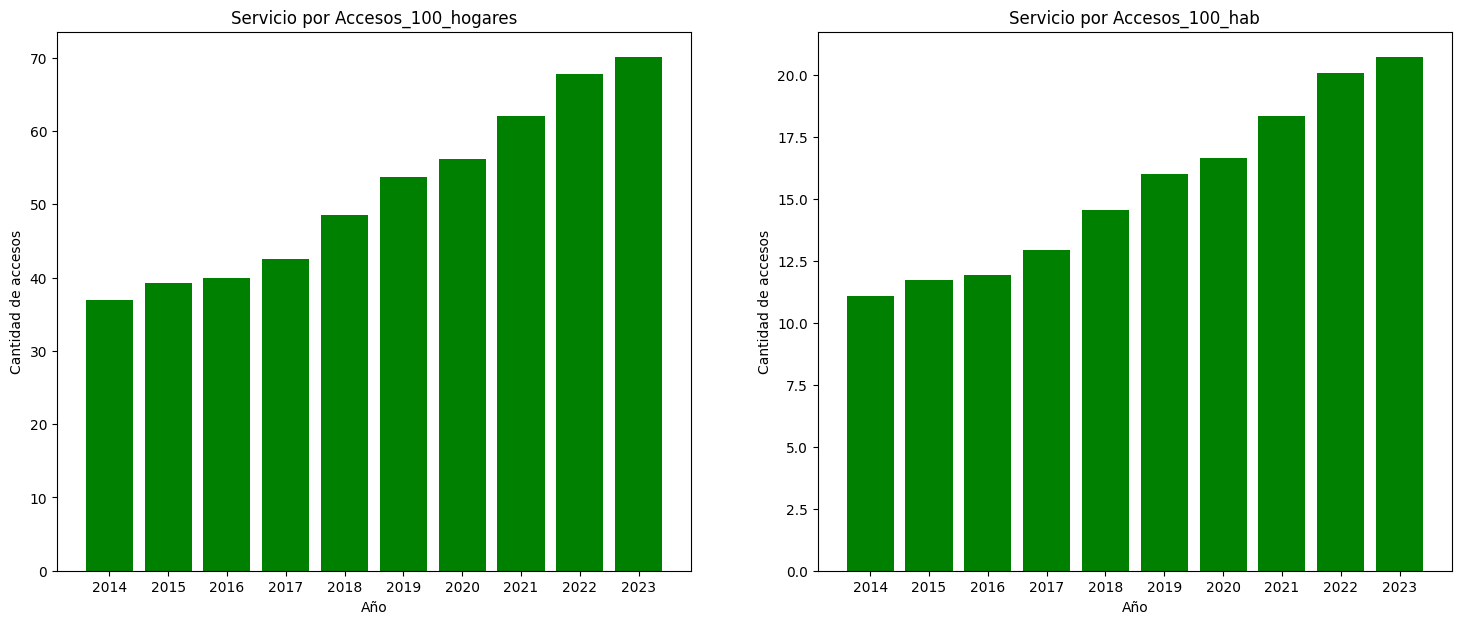

In [10]:
promedio_anio = pen_internet.groupby(['Año']).agg({'Accesos_100_hogares': 'mean', 'Accesos_100_hab': 'mean'}).reset_index()

columns = ["Accesos_100_hogares", "Accesos_100_hab"]

fig, axs = plt.subplots(1,2, figsize=(18,7))

for i in range(len(axs)):
    axs[i].bar(promedio_anio["Año"], promedio_anio[columns[i]], color=["green"])
    axs[i].set_xlabel('Año')
    axs[i].set_title('Servicio por' + ' ' + columns[i])
    axs[i].set_ylabel('Cantidad de accesos')
    axs[i].set_xticks(promedio_anio['Año'])
    
plt.show()

Ahora visualizaremos las distribucion de los accesos por las provincias.

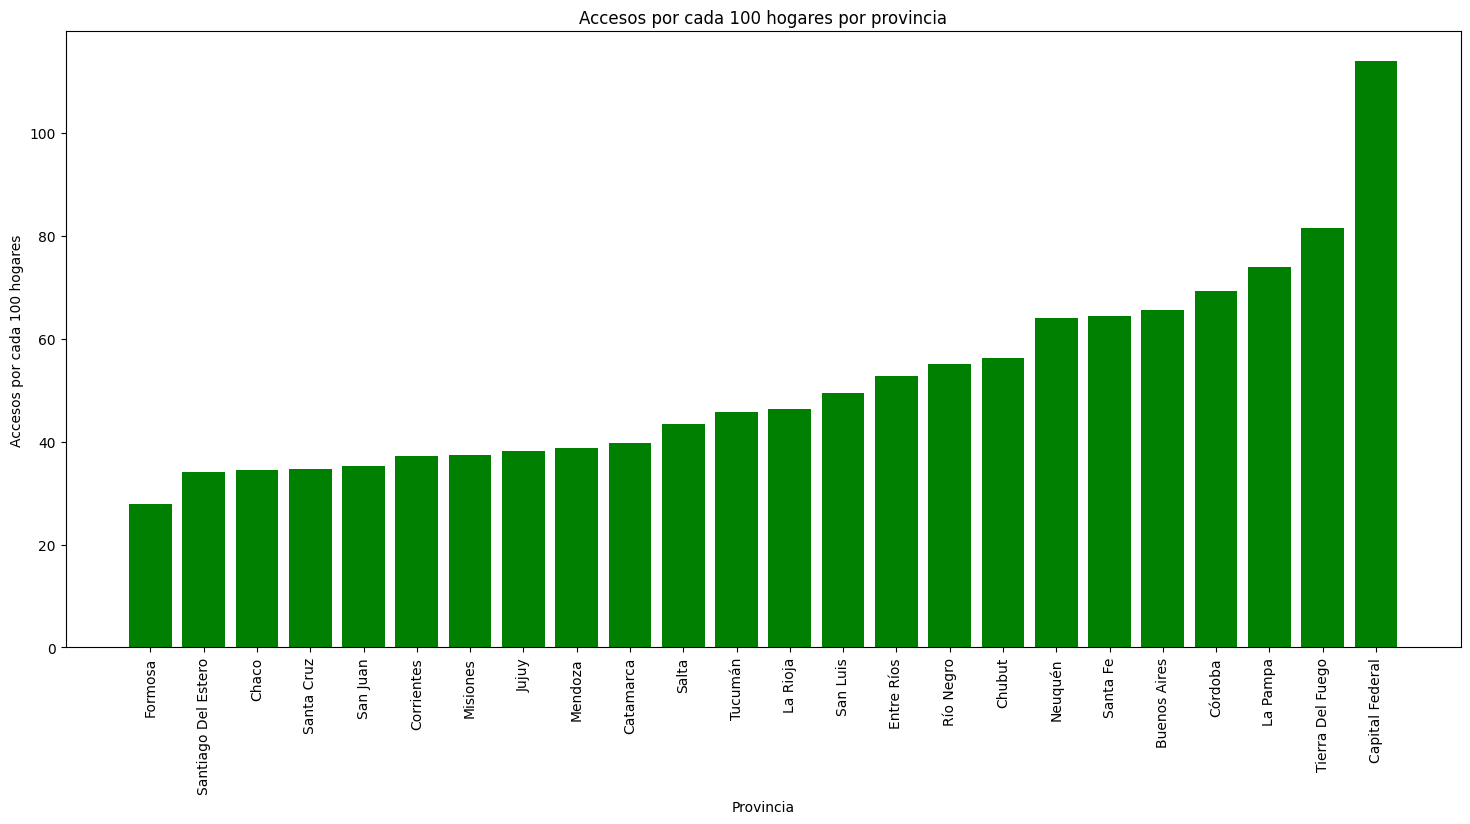

In [11]:
promedio_prov = pen_internet.groupby(['Provincia']).agg({'Accesos_100_hogares': 'mean', 'Accesos_100_hab': 'mean'}).reset_index()

promedio_prov.sort_values(by='Accesos_100_hogares', ascending=True, inplace=True)
    
plt.figure(figsize=(18, 8))
plt.bar(promedio_prov["Provincia"], promedio_prov["Accesos_100_hogares"], color="green")
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares por provincia')
plt.xticks(rotation=90)
plt.show()

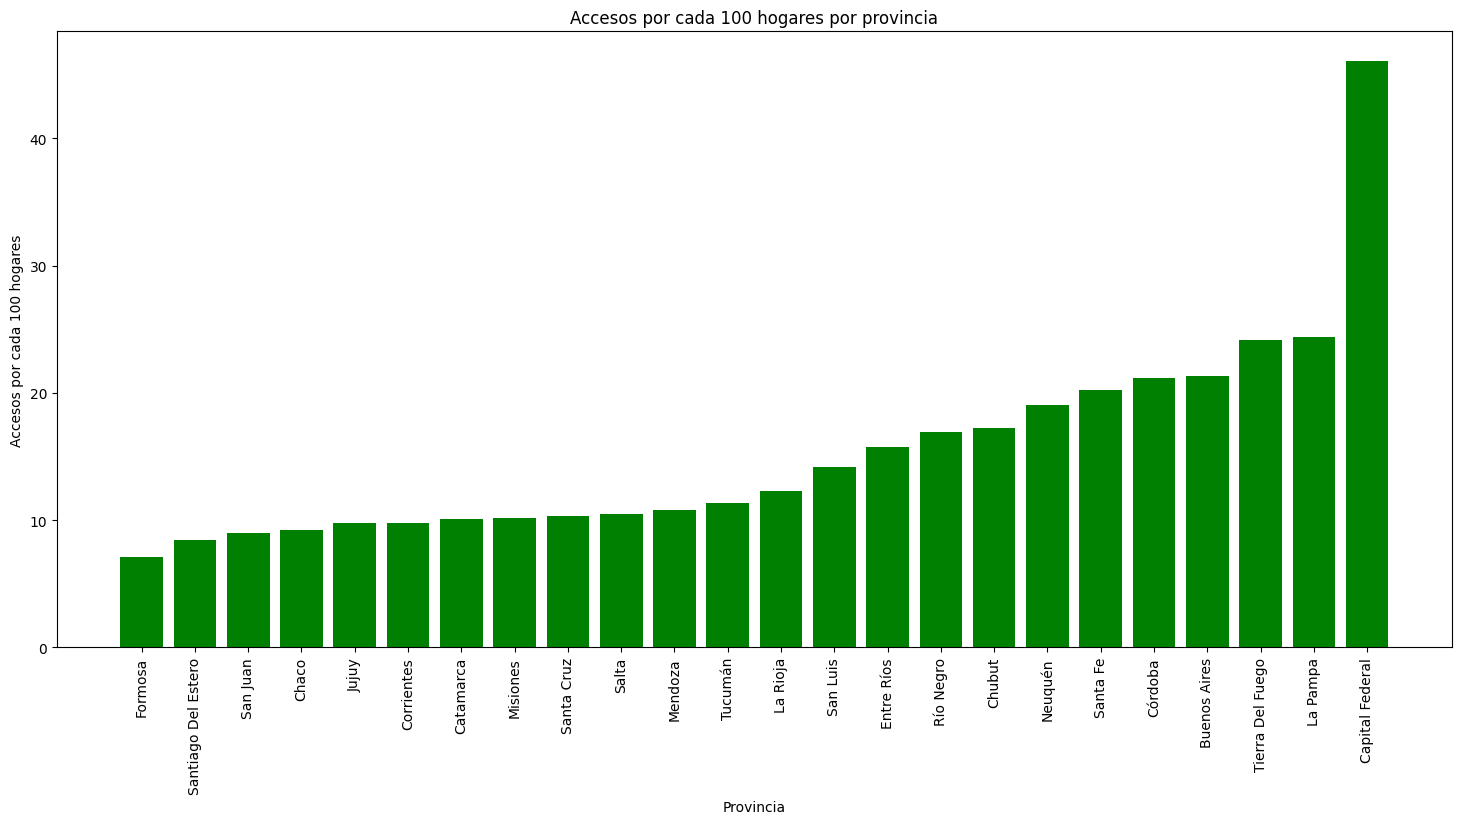

In [12]:
promedio_prov.sort_values(by='Accesos_100_hab', ascending=True, inplace=True)
    
plt.figure(figsize=(18, 8))
plt.bar(promedio_prov["Provincia"], promedio_prov["Accesos_100_hab"], color="green")
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares por provincia')
plt.xticks(rotation=90)
plt.show()

# Guardar los datos

In [13]:
pen_internet.to_csv("../Datasets/Cleans/Penetracion_internet.csv", index=False)